In [1]:
import pandas as pd
import numpy as np 


import seaborn as sns
import matplotlib.pyplot as plt

from utils.Preprocessing import cleaning, tokenizer, tokenizer_spacy, lemmatize_spacy

In [2]:
DIR = "/home/marem/VscProjects/"

In [3]:
df_young = pd.read_csv(DIR+"theGIRLS/scripts/outputs/Young_True_mask_no_user.csv", sep=",")
df_old = pd.read_csv(DIR+"theGIRLS/scripts/outputs/Old_True_mask_no_user.csv", sep=",")

print(df_young.shape, df_old.shape)

df_young = df_young[["id_original", "text", "parent_text", "label", "source", "origin", "Young"]]
df_old = df_old[["Old"]]


df = pd.concat([df_old, df_young], axis=1)
df_ = df [["id_original","parent_text", "text", "Old", "Young", "label", "source"]]
df_ = df.drop_duplicates(subset=["id_original"])
print(df_.shape)

(787, 9) (787, 9)
(471, 8)


In [4]:
id_original_toremove = [
"1579723813620944896",
"1580035289006817280",
"1579757446801002496",
"fjc7rcq",
"1579742011846184960",
"1579753297002758146",
"1579739548212670465",
"fjcj3me",
"fj5preb",
"fj6ylhi",
"1579571193338040320",
"1579742664349876224",
"1572501686031360000",
"1572499496688570370",
"fjam4g8",
"1580015843953766401",
"1579904821766672384",
"1579754796760039424"
]

df_clean = df_[~df_.id_original.isin(id_original_toremove)].reset_index(drop=True)
print(df_clean.shape)

(453, 8)


In [5]:
df_original_y = df[df["origin"].isin(["young"])]
df_original_y = df_original_y.drop(columns="Old")
df_original_y_iro = df_original_y[df_original_y["label"].isin(["ironic"])]
df_original_y_not = df_original_y[df_original_y["label"].isin(["serious"])]


df_original_o = df[df["origin"].isin(["old"])]
df_original_o = df_original_o.drop(columns="Young")
df_original_o_iro = df_original_o[df_original_o["label"].isin(["ironic"])]
df_original_o_not = df_original_o[df_original_o["label"].isin(["serious"])]

In [6]:
print(df_original_y_iro.shape, df_original_o_iro.shape)

(98, 7) (85, 7)


### Statistiche sui testi generati 
- numero token
- ttr 
- named entities

In [7]:
df_clean

,Old,id_original,text,parent_text,label,source,origin,Young
0,You can’t compete in high school track after y...,fj58o1f,Is there anyway to run as a sport in college o...,"They should get over it, since they’re not in ...",ironic,reddit,young,You’re telling me you’d rather not have a 100m...
1,"No, we have a devolved parliament and government.",1572514167629959168,The Bunnett understanding how elections work....,The people of Scotland had a vote on devolutio...,ironic,twitter,young,"No, you have to have a referendum every time y..."
2,You can see how this plays out: cuts swathes o...,1572500629440049156,Ah didn't see that. Still figuring out how b...,You can see how this plays out: cuts swathes o...,ironic,twitter,young,You forgot the part where the UK becomes a tax...
3,I'm from the UK and I'm jealous,fj85v4k,Winter to be replaced by autumn soon.,"The four seasons in Australia are Summer, Summ...",ironic,reddit,young,And the fifth season is Summer.
4,You are comparing the protest of a few thousan...,fjcb7l5,"Ah yes, because it was this exact person who w...",So funny! A British guy saying that if Indians...,ironic,reddit,young,You are the one who is unjust. You are the one...
...,...,...,...,...,...,...,...,...
448,I'm not touching that,fj52q73,Happy cake day!,Bumping privates,serious,reddit,old,I thought this was r/unexpectedthanos
449,I was dreaming of a world where people are kin...,fj5zsdl,The babyverse will never let such a thing happen,"Just dreamt of China, India and Pakistan in a ...",serious,reddit,old,I had a dream that I was a mango.
450,I've never seen so many people smoking in one ...,1542166847398739968,Kip on all sides,Thought the exact same a few weeks ago arrivin...,serious,twitter,old,I was just thinking the same thing this mornin...
451,Congratulations to the young man indeed.,1537823039659843585,Thanks so much Donna,Fantastic Elaine. Congratulations to the young...,serious,twitter,old,Thank you so much


### mean token

In [8]:
def len_token (df, column, case_name):
  len_token = []
  for ans in df[column]:
    tokens = tokenizer_spacy(ans)
    len_token.append(len(tokens))
  print(f"mean token in {case_name} replies: ", round(np.average(len_token)))

  return len_token


len_token_o_txt = len_token (df_clean, "text", "original")
len_token_parent = len_token (df_clean, "parent_text", "parent")
print()
len_token_o_young = len_token (df_original_y_iro, "text", "human Young")
len_token_g_young = len_token (df_clean, "Young", "Young")
print()
len_token_o_old = len_token(df_original_o_iro, "text", "human Old")
len_token_g_old = len_token (df_clean, "Old", "Old")

mean token in original replies:  19
mean token in parent replies:  29

mean token in human Young replies:  16
mean token in Young replies:  15

mean token in human Old replies:  18
mean token in Old replies:  12


In [9]:
dict_token_comparison = {"human texts young": len_token_o_txt, "young generated texts": len_token_g_young, "old generated texts": len_token_g_old}
print(max(len_token_o_txt), max(len_token_g_young), max(len_token_g_old))
df_token_comparison = pd.DataFrame.from_dict(dict_token_comparison)

172 242 210


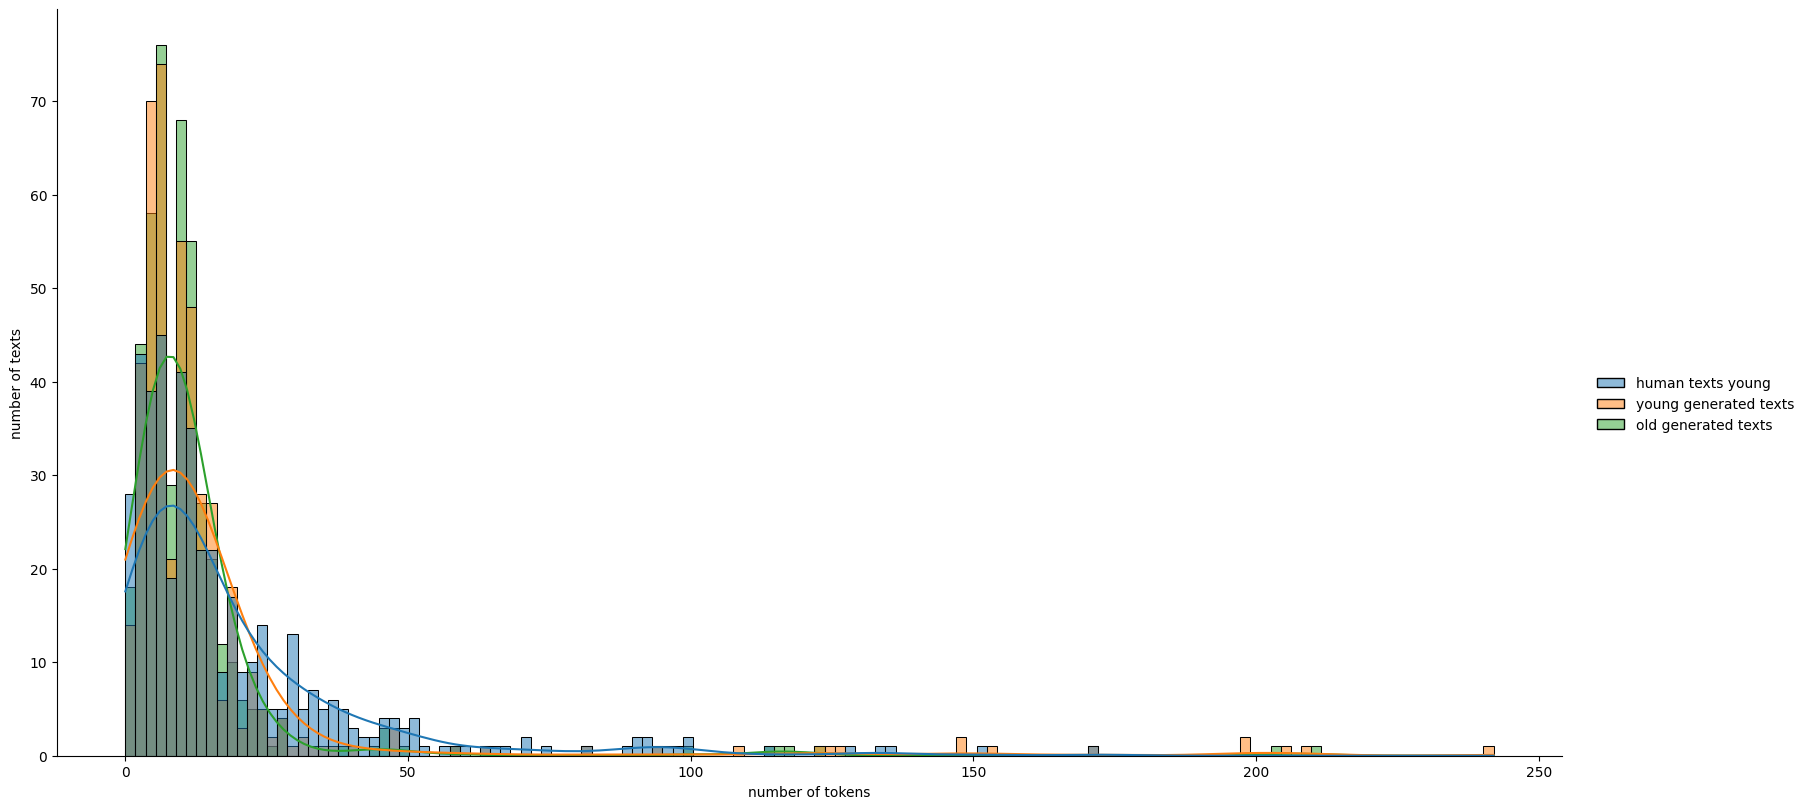

In [10]:
fig = sns.displot(data=df_token_comparison, kde=True, height=8, aspect=2)
# plt.figsize(10,10)
plt.xlabel("number of tokens")
plt.ylabel("number of texts")
plt.show(fig)

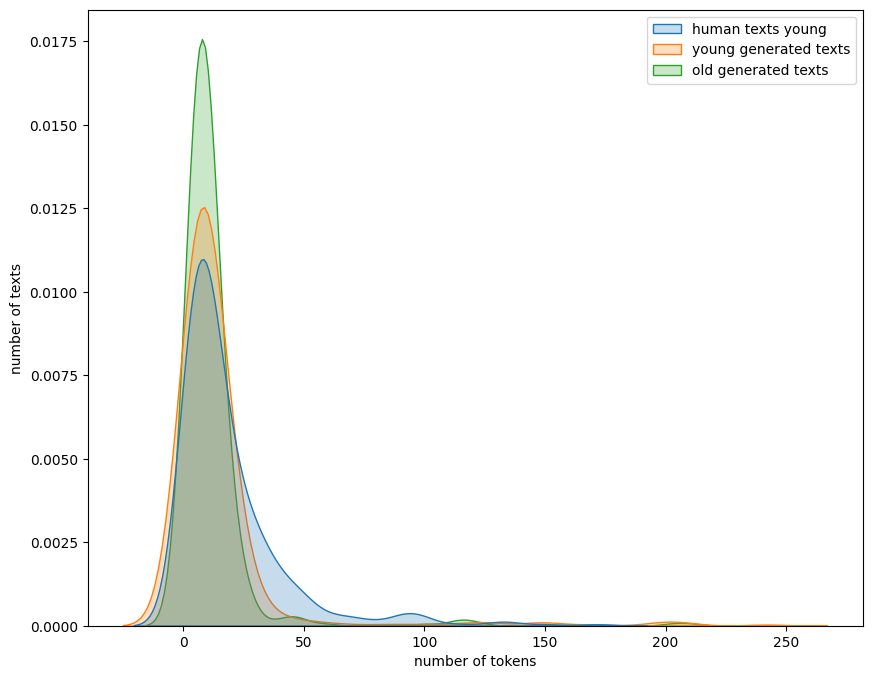

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(data=df_token_comparison, fill=True, ax=ax)
plt.xlabel("number of tokens")
plt.ylabel("number of texts")
plt.show(fig)

### interjection

In [12]:
import spacy_udpipe

# spacy.cli.download("en_core_web_lg")
# spacy_udpipe.download("en") 

def get_interjection(list_txt):
    nlp = spacy_udpipe.load('en')
    interjections=[]
    for i in list_txt:
        txt = nlp(i)
        for t in txt:
            if t.pos_ == 'INTJ':
                # print(t.pos_)
                interjections.append(t.lemma_)
    return interjections

o_int= get_interjection(df_clean['text'].tolist())

g_y_int= get_interjection(df_clean['Young'].tolist())
g_o_int = get_interjection(df_clean['Old'].tolist())


print('mean original: ', round(np.average(len(o_int))))
print("mean parent", round(np.average(len(get_interjection(df_clean["parent_text"].tolist())))))
print("mean human young", round(np.average(len(get_interjection(df_original_y_iro["text"].tolist())))))
print("mean human old", round(np.average(len(get_interjection(df_original_o_iro["text"].tolist())))))
print()
print('mean generated (young): ', round(np.average(len(g_y_int))))
print('mean generated (old): ', round(np.average(len(g_o_int))))

mean original:  78
mean parent 53
mean human young 19
mean human old 25

mean generated (young):  29
mean generated (old):  33


### ttr

In [13]:
def ttr(lista):
    tokens=[]
    for i in lista:
        l = tokenizer(i)
        # print(l)
        tokens.extend(l)
        # print(tokens)
    ttr = len(list(set(tokens)))/len(tokens)
    # print(ttr)
    return ttr


o_ttr= ttr(df_clean['text'].tolist())

g_y_ttr= ttr(df_clean['Young'].tolist())
g_o_ttr = ttr(df_clean['Old'].tolist())

print('original: ', round(o_ttr, 3))
print("parent ", round(ttr(df_clean["parent_text"]),3))
print()
print("human young ", round(ttr(df_original_y_iro["text"]),3))
print("human old ",round(ttr(df_original_o_iro["text"]),3))
print()
print('generated (young): ', round(g_y_ttr, 3))
print('generated (old): ', round(g_o_ttr, 3))

original:  0.289
parent  0.256

human young  0.463
human old  0.467

generated (young):  0.189
generated (old):  0.225


### ner

In [14]:
import spacy 

def list_entities(df, column_text, column_id):
    # list_txt = df[column_text].tolist()
    labels= ['WORK_OF_ART', 'ORG', 'PERSON', 'GPE', 'LOC', 'EVENT', 'NORP', 'PRODUCT', 'DATE', 'LANGUAGE', 'LAW']    
    nlp = spacy.load("en_core_web_lg")
    entities = []
    id_entities = {id: [] for id in df[column_id]}

    texts = df[column_text].tolist()
    ids = df[column_id].tolist()

    for txt, id in zip(texts, ids):
        doc = nlp(str(txt))
        for t in doc.ents:
             if t.label_ in labels:
                entities.append(t.text)
                id_entities[id].append(t.text)
        
    # print(list(set(entities)))
    # print(id_entities)
    return len(entities), id_entities

o_ent, dict_o_ents = list_entities(df_clean,'text', 'id_original')
o_ent_y, dict_o_ents_y = list_entities(df_original_y_iro,'text', 'id_original')
o_ent_o, dict_o_ents_o = list_entities(df_original_o_iro,'text', 'id_original')

g_y_ent, dict_g_y_ents = list_entities(df_clean, 'Young', 'id_original')
g_o_ent, dict_g_o_ents = list_entities(df_clean, 'Old', 'id_original')
parent_ent, dict_parent_ents = list_entities(df_clean,"parent_text", "id_original")

print('parent:')
print('\t', parent_ent)
print('original:')
print('\t', o_ent)
print("human young ", o_ent_y)
print("human old ", o_ent_o)
print('Young:')
print('\t',g_y_ent)
print('Old:')
print('\t',g_o_ent)

parent:
	 588
original:
	 358
human young  56
human old  59
Young:
	 282
Old:
	 174


In [15]:
count_original = 0
count_generated =0
count_match =0
list_matches = []

for key,value in dict_parent_ents.items():
    if len(value) != 0:
         count_original +=1
    for k,v in dict_g_y_ents.items():
        if key == k:
            if len(value) != 0 and len(v) != 0:
                    count_match +=1
                    list_matches.append(key)

for k,v in dict_g_y_ents.items():
    if len(v) != 0:
        count_generated +=1

print("full values in original: ", count_original)
print("full values in Young: ", count_generated)
print(" Young matching cases: ", count_match)

full values in original:  241
full values in Young:  111
 Young matching cases:  82


In [16]:
count_original = 0
count_generated =0
count_match =0
list_matches = []

for key,value in dict_parent_ents.items():
    if len(value) != 0:
         count_original +=1
    for k,v in dict_g_o_ents.items():
        if key == k:
            if len(value) != 0 and len(v) != 0:
                    count_match +=1
                    list_matches.append(key)

for k,v in dict_g_o_ents.items():
    if len(v) != 0:
        count_generated +=1

print("full values in original: ", count_original)
print("full values in Old: ", count_generated)
print("Old matching cases: ", count_match)

full values in original:  241
full values in Old:  99
Old matching cases:  71


### negations

In [17]:
import spacy
def get_negation (list_txt):
    nlp = spacy.load("en_core_web_lg")
    negations = []
    for i in list_txt:
        txt = nlp(i)
        for token in txt:
            if token.dep_ == "neg":
                negations.append(token.text)
    
    return negations

o_neg= get_negation(df_clean['text'].astype(str).tolist())

g_y_neg= get_negation(df_clean['Young'].astype(str).tolist())
g_o_neg = get_negation(df_clean['Old'].astype(str).tolist())

print('mean parent: ', round(np.average(len(get_negation(df_clean['parent_text'].astype(str).tolist())))))
print('mean original text: ', round(np.average(len(o_neg))))
print("mean original (young): ",round(np.average(len(get_negation(df_original_y_iro['text'].astype(str).tolist())))))
print("mean original (old): ",round(np.average(len(get_negation(df_original_o_iro['text'].astype(str).tolist())))))
print()
print('mean generated (young): ', round(np.average(len(g_y_neg))))
print('mean generated (old): ', round(np.average(len(g_o_neg))))

mean parent:  231
mean original text:  163
mean original (young):  29
mean original (old):  25

mean generated (young):  121
mean generated (old):  121


### complexity

In [18]:
nlp = spacy.load("en_core_web_lg")

def get_tree_height(token):
    if not any(token.children):
        return 1  # If the token has no children, the height is 1.
    else:
        return 1 + max(get_tree_height(child) for child in token.children)  # The height is 1 plus the maximum height of its children's subtrees.

def get_sentence_tree_height(doc):
    heights = []
    for sent in doc.sents: 
        roots = [token for token in sent if token.head == token]  # Find the head
        if not roots:
            heights.append(0)
        else:
            heights.append(max(get_tree_height(root) for root in roots))
    return heights

def calculate_tree_heights(df, column_name,new_column_name):
    # Use nlp.pipe to process the sentences in batches
    sentences = df[column_name].tolist()
    docs = nlp.pipe(sentences)
    
    tree_heights = []
    for doc in docs:
        heights = get_sentence_tree_height(doc)
        if heights:
            tree_heights.append(heights[0])  # Assuming one sentence per row
        else:
            tree_heights.append(0)
    
    df[new_column_name] = tree_heights
    return df

In [19]:
# Example usage
df_complexity_generated = df_clean[["id_original","Young", "Old"]]
df_complexity_human_young = df_original_y_iro[["id_original", "text"]]
df_complexity_human_old = df_original_o_iro[["id_original", "text"]]

df_complexity_generated = calculate_tree_heights(df_complexity_generated, 'Young', "generated reply Young")
df_complexity_generated = calculate_tree_heights(df_complexity_generated, 'Old', "generated reply Old")
df_complexity_human_young = calculate_tree_heights(df_complexity_human_young, 'text', "human reply Young")
df_complexity_human_old = calculate_tree_heights(df_complexity_human_old, 'text', "human reply Old")

/tmp/ipykernel_56346/4023919177.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = tree_heights
/tmp/ipykernel_56346/4023919177.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = tree_heights
/tmp/ipykernel_56346/4023919177.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

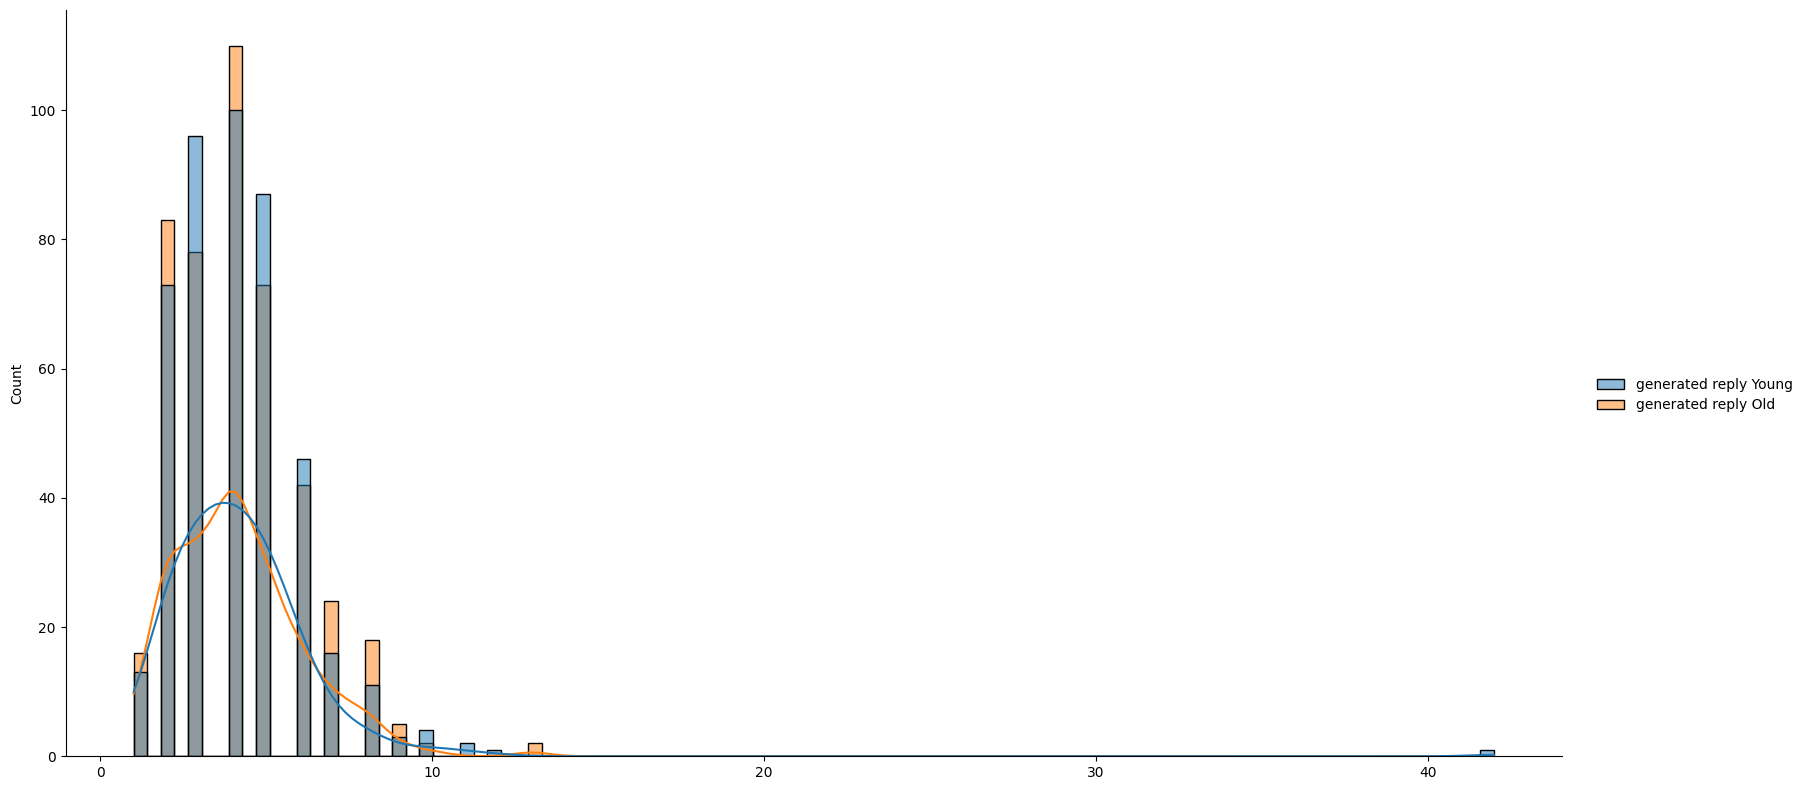

In [20]:
fig = sns.displot(data=df_complexity_generated[["generated reply Young", "generated reply Old"]], kde=True, height=8, aspect=2)

### text similarity

In [21]:
import gensim.downloader as api
from scipy.spatial.distance import cosine

# Load pre-trained word2vec model
model = api.load('word2vec-google-news-300')

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    if length == 0:
        print("attention!!!!")
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def cosine_distance_wordembedding_method(s1, s2):
    vector_1 = get_average_word2vec(s1.split(), model)
    vector_2 = get_average_word2vec(s2.split(), model)
    if np.all(vector_1 == 0) or np.all(vector_2 == 0): #if one of the vectors is zero they are considered maximally dissimilar
        return 1.0
    cosine_distance = cosine(vector_1, vector_2)
    return 1-cosine_distance

str1 = "Your first text here"
str2 = "Your second text here"
print(cosine_distance_wordembedding_method(str1, str2))

0.9770016074180603


In [22]:
list_parent = df_clean["parent_text"].astype(str).tolist()
list_text = df_clean["text"].astype(str).tolist()
list_generated_young = df_clean["Young"].astype(str).tolist()
list_generated_old = df_clean["Old"].astype(str).tolist()
list_id = df_clean["id_original"].tolist()


dict_similarity = {}

for i in range(len(list_parent)):
    parent_txt = list_parent[i]
    txt = list_text[i]
    generated_txt_young= list_generated_young[i]
    generated_txt_old= list_generated_old[i]
    id = list_id[i]
    computed_similarity_txt = cosine_distance_wordembedding_method(parent_txt,txt)
    computed_similarity_generated_young = cosine_distance_wordembedding_method(parent_txt,generated_txt_young)
    computed_similarity_generated_old = cosine_distance_wordembedding_method(parent_txt,generated_txt_old)
    dict_similarity[id]=[computed_similarity_txt,computed_similarity_generated_young,computed_similarity_generated_old]

In [23]:
similarity_text = pd.DataFrame.from_dict(dict_similarity, orient="index", columns=["sim_text", "sim_generated_young", "sim_generated_old"])

similarity_text.reset_index(inplace=True)
similarity_text.rename(columns={"index": "id_original"}, inplace=True)

In [24]:
similarity_text

,id_original,sim_text,sim_generated_young,sim_generated_old
0,fj58o1f,0.756098,0.693141,0.735598
1,1572514167629959168,0.688331,0.788130,0.605159
2,1572500629440049156,0.625289,0.713162,1.000000
3,fj85v4k,0.557536,0.663652,0.350222
4,fjcb7l5,0.787314,0.673544,0.704754
...,...,...,...,...
448,fj52q73,0.096739,0.052592,0.219028
449,fj5zsdl,0.519392,0.469404,0.575683
450,1542166847398739968,0.439063,0.750835,0.531067
451,1537823039659843585,0.456470,0.511208,0.895792


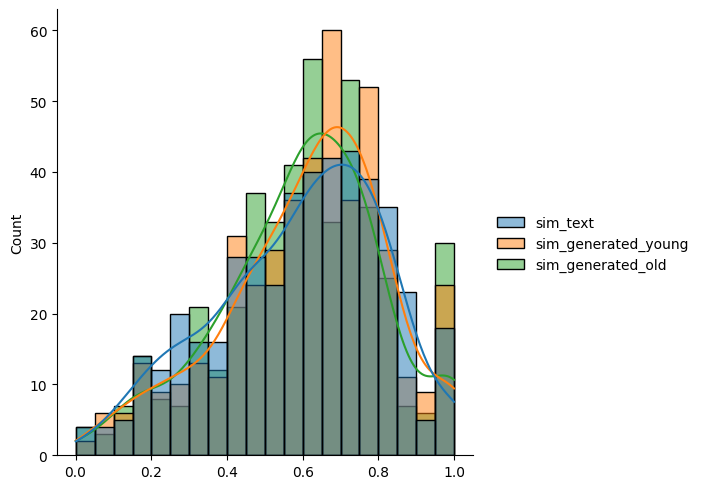

In [25]:
sns.displot(similarity_text[["sim_text", "sim_generated_young", "sim_generated_old"]],kde=True)

### Comparazione testi considerati ironici e seri dalle stesse generazioni

In [26]:
list_parent = df_original_y_iro["parent_text"].astype(str).tolist()
list_text = df_original_y_iro["text"].astype(str).tolist()

list_similarities = []

for i in range(len(list_parent)):
    parent_txt = list_parent[i]
    txt = list_text[i]
    computed_similarity = cosine_distance_wordembedding_method(parent_txt,txt)
    list_similarities.append(computed_similarity)

print("mean similarities original-young-iro -->", round(np.average(list_similarities),3))
print("mean similarities generated-young-->", round(np.average(similarity_text["sim_generated_young"].tolist()),3))
print()
print("std similarities original-young-iro -->", round(np.std(list_similarities),3))
print("std similarities generated-young-->", round(np.std(similarity_text["sim_generated_young"].tolist()),3))

mean similarities original-young-iro --> 0.57
mean similarities generated-young--> 0.61

std similarities original-young-iro --> 0.209
std similarities generated-young--> 0.214


In [27]:
list_parent = df_original_o_iro["parent_text"].astype(str).tolist()
list_text = df_original_o_iro["text"].astype(str).tolist()

list_similarities = []

for i in range(len(list_parent)):
    parent_txt = list_parent[i]
    txt = list_text[i]
    computed_similarity = cosine_distance_wordembedding_method(parent_txt,txt)
    list_similarities.append(computed_similarity)

print("mean similarities original-old-iro -->", round(np.average(list_similarities),3))
print("mean similarities generated-old-->", round(np.average(similarity_text["sim_generated_old"].tolist()),3))
print()
print("std similarities original-old-iro -->", round(np.std(list_similarities),3))
print("std similarities generated-old-->", round(np.std(similarity_text["sim_generated_old"].tolist()),3))

mean similarities original-old-iro --> 0.584
mean similarities generated-old--> 0.598

std similarities original-old-iro --> 0.22
std similarities generated-old--> 0.214


### similarity between generated texts

In [28]:
list_generated_young = df_clean["Young"].astype(str).tolist()
list_generated_old = df_clean["Old"].astype(str).tolist()
list_id = df_clean["id_original"].tolist()


dict_similarity = {}

for i in range(len(list_generated_young)):
    generated_txt_young= list_generated_young[i]
    generated_txt_old= list_generated_old[i]
    id = list_id[i]
    computed_similarity_young_old = cosine_distance_wordembedding_method(generated_txt_young,generated_txt_old)
    dict_similarity[id]=[computed_similarity_young_old]

In [29]:
similarity_text = pd.DataFrame.from_dict(dict_similarity, orient="index", columns=["sim_young_old"])

similarity_text.reset_index(inplace=True)
similarity_text.rename(columns={"index": "id_original"}, inplace=True)

In [30]:
print(similarity_text["sim_young_old"].mean())
print(similarity_text["sim_young_old"].std())


0.6095957693655912
0.2300764703966458


In [31]:
similarity_text

,id_original,sim_young_old
0,fj58o1f,0.653336
1,1572514167629959168,0.561395
2,1572500629440049156,0.713162
3,fj85v4k,0.414138
4,fjcb7l5,0.636600
...,...,...
448,fj52q73,0.616780
449,fj5zsdl,0.771450
450,1542166847398739968,0.640413
451,1537823039659843585,0.500265


## Annotations

In [32]:
young = pd.read_csv(DIR+"theGIRLS/annotation/young_annotations.csv").drop([0,1])
old = pd.read_csv(DIR+"theGIRLS/annotation/old_annotations.csv").drop([0,1])

In [33]:
attention_cols = [c for c in young.columns if c.startswith("attention")]
young = young.drop(attention_cols, axis=1)

In [34]:
attention_cols = [c for c in old.columns if c.startswith("attention")]
old = old.drop(attention_cols, axis=1)

In [35]:
def get_corresponding_value(row):
    col1_values = row['model_id'].split('#')
    col2_number = row['label_id'].split('.')[0]

    for value in col1_values:
        number, word = value.split('.')
        if number == col2_number:
            return word


def clean_df(df, df_clean):
    col_names = df.columns.tolist()
    col_id = [col for col in col_names if "1.Old#2.Young" in col or "1.Young#2.Old" in col]

    df_melted = df.melt(id_vars=["StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)",
                  "Finished", "RecordedDate", "ResponseId", "RecipientLastName",
                  'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
                  'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
                  'UserLanguage', "PROLIFIC_PID"], value_vars=col_id,
                    var_name="model_id", value_name="label_id")

    # Separiamo la colonna "model_id" in due colonne "model" e "id"
    df_melted[["id_original", "model_id"]] = df_melted["model_id"].str.split("_", expand=True)

    # Riorganizziamo le colonne e ordiniamo per "date" per avere l'output desiderato
    df_final = df_melted[["id_original", "PROLIFIC_PID", "Duration (in seconds)",
                  "Finished", "RecordedDate", "ResponseId",
                    "model_id", "label_id"]].sort_values(by=["id_original","PROLIFIC_PID"])
    
    df_final = df_final.dropna(subset="label_id")
    df_final.reset_index(drop=True, inplace=True)

    df_final = df_final.merge(df_clean[["Young", "Old", "id_original"]], on="id_original")

    df_final['label'] = df_final.apply(get_corresponding_value, axis=1)
    df_final['label'] = df_final['label'].fillna("Neither").str.replace(']','', regex=False)

    return df_final

In [36]:
ann_young = clean_df(young, df_clean)
ann_old = clean_df(old, df_clean)

In [37]:
ann_young["annotators"] = "young"
ann_old["annotators"] = "old"

In [38]:
df_annotations = pd.concat([ann_young,ann_old],axis=0)
df_annotations = df_annotations.merge(df_clean[["id_original", "parent_text", "text"]], on="id_original")

In [39]:
print(ann_young.shape, ann_old.shape, df_annotations.shape)

(918, 12) (1145, 12) (2063, 14)


In [40]:
df_annotations =df_annotations.sort_values(by="id_original")
df_annotations.to_csv("E2_dataset_merge.csv")

In [47]:
df_annotations.shape

(2063, 14)

### entropy

In [41]:
id_label_dict = df_annotations.groupby('id_original')['label'].apply(list).to_dict()

In [42]:
from collections import Counter
import math

def normalized_entropy(labels):
    label_counts = Counter(labels)
    total_labels = len(labels)

    if len(label_counts) == 1:  # If there's only one label, entropy is 0
        return 0

    entropy = 0
    for count in label_counts.values():
        probability = count / total_labels
        entropy -= probability * math.log2(probability)
    normalized_entropy = entropy / math.log2(len(label_counts))
    return round(normalized_entropy, 3)

dict_entropy={}
for key,value in id_label_dict.items():
  result = normalized_entropy(value)
  dict_entropy[key] = result

In [43]:
df_entropy = pd.DataFrame.from_dict(dict_entropy, orient="index",columns=["entropy"])
df_entropy.reset_index(inplace=True)
df_entropy.rename(columns={"index":"id_original"}, inplace=True)
df_entropy = df_entropy.merge(df_clean[["parent_text", "text", "id_original"]], on = "id_original").drop_duplicates()
df_entropy = df_entropy.merge(df_annotations[["Old", "Young", "id_original"]], on = "id_original").drop_duplicates()
df_entropy = df_entropy.sort_values(by="entropy")
df_entropy.to_csv(DIR+"theGIRLS/linguistic analysis/annotazione_manuale/entropy.csv")


In [44]:
df_entropy = df_entropy.merge(similarity_text[["sim_young_old", "id_original"]], on="id_original")

In [45]:
import scipy.stats as stats

correlation, p_value = stats.pearsonr(df_entropy['entropy'], df_entropy['sim_young_old'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.023145512282962997
P-value: 0.6378405055764048


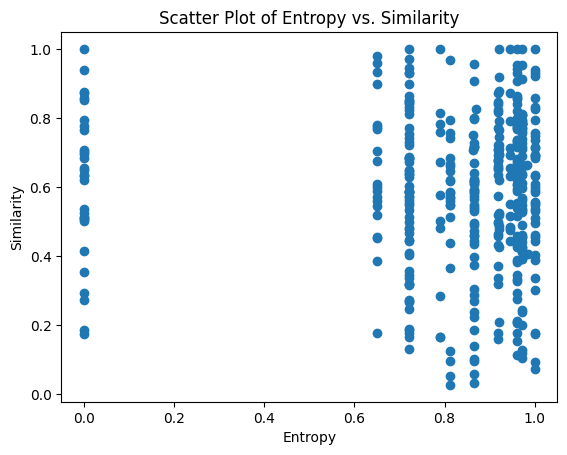

In [46]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named df and columns are 'entropy' and 'similarity'
plt.scatter(df_entropy['entropy'], df_entropy['sim_young_old'])
plt.xlabel('Entropy')
plt.ylabel('Similarity')
plt.title('Scatter Plot of Entropy vs. Similarity')
plt.show()